### Сентябрь 2020 г. 
### DST 10 // Юнит 7. Machine Learning в продакшн // MATH&STAT-7. Временные ряды

# 7.1. Вступление к модулю

### ЧТО ЭТО И ЗАЧЕМ?
Временной ряд — это измерения одной и той же случайной величины в разные моменты времени.

Дело в том, что с появлением зависимости наблюдений от времени вся математическая структура данных поменялась — наблюдения одной и той же переменной в разные моменты времени стали зависимыми между собой. Мы получили так называемый временной ряд.

Примеры временных рядов:

- всевозможные экономические индексы, такие как индекс RTS, DJIA и другие;
- стоимость активов на бирже — всевозможные курсы нефти, ценных бумаг, валют и криптовалют:
- физические показатели спортсмена во время тренировок или специальных нагрузочных тестов;
- скорость интернета;
- регулярные измерения роста, веса, давления;
- температура воды в Красном море по дням в июле.

Ещё пара примеров из бизнеса:
- прогнозирование числа пользователей сайта
- прогнозирование удовлетворенности клиента
- прогнозирование трафика

### ЧТО БУДЕМ ИЗУЧАТЬ В ЭТОМ МОДУЛЕ

В этом модуле мы:

Познакомимся с основными идеями и понятиями анализа временных рядов такими, как тренд, сезонность.
Узнаем, чем страшна нестационарность, и как с ней можно бороться.
Познакомимся с некоторыми алгоритмами прогноза.


# 7.2. Линейная регрессия

### УСЛОВИЯ ГАУССА-МАРКОВА
#### Модель: 

Мы предполагаем, что Y зависит от X линейно с небольшой случайной добавкой $\varepsilon$. Настоящие коэффициенты $β_i$ неизвестны и чтобы их оценить, мы берём выборку из n наблюдений

#### Условие 1.

Корректная спецификация модели.
Это значит, что мы сделали верное предположение о характере зависимости (линейной в нашем случае) и собрали «хорошие» признаки.

#### Условие 2.

Признак X должен быть детерминированной величиной, отличной от константы.
Иными словами, все X не случайны и не все равны друг другу.

#### Условие 3.
Ожидаемое (среднее) значение отклонений нулевое

#### Условие 4. 

Гомоскедастичность: разброс отклонений в среднем одинаковый для всех наблюдений
Иными словами, это значит, что разброс ошибок в среднем одинаков для всех наблюдений.

#### Условие 5. 

Независимость ошибок.

Все вместе условия Гаусса-Маркова гарантируют нам «хорошие» оценки для параметров модели  и высокое качество прогноза. «Хорошие» здесь означает, что они несмещённые, состоятельные и эффективные (обладают наименьшим разбросом среди всех остальных несмещённых оценок).

## Задание 7.2.1
Гомоскедастичность — это: Условие равенства всех дисперсий ошибок верно

## Задание 7.2.2
Выберите верные утверждения:
- Гетероскедастичность нарушает условия Гаусса-Маркова
- Сильная отрицательная корреляция между целевой переменной и признаком в парной регрессии не нарушает условия Гаусса-Маркова

## Задание 7.2.3
1. Да
2. Нет
3. Да
4. Нет
5. Да
6. 4
7. 2

## Дополнительные материалы:

[Разные способы построить линейную регрессию в Python](https://habr.com/ru/post/279117/ 'Habr')

# 7.3. Практика. Линейная регрессия
В этом разделе мы познакомимся с генерацией нормального белого шума и посмотрим на практике, как влияет на качество OLS оценок гетероскедастичность.

[Ноутбук к этому материалу](Юнит 7. Machine Learning в продакшн\white_noise.ipynb)

ЗАДАНИЕ

- → Загрузите датасет BostonHousing из библиотеки sklearn (с ним мы работали ранее).

- → Обучите линейную регрессию стоимости дома на параметры CRIM, RM.

- → Выполните задания ниже.

In [178]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# Load dataset
boston = load_boston()
X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['PRICE']

In [180]:
# Fit
LR = LinearRegression()
LR.fit(X[['CRIM', 'RM']],y)

LinearRegression()

## Задание 7.3.1
Выведите коэффициенты модели, округлив ответ до сотых:

In [181]:
print('CRIM {:.2f} RM {:.2f} INTERCEPT{:.2f}'.format(LR.coef_[0][0], LR.coef_[0][1], LR.intercept_[0]))

CRIM -0.26 RM 8.39 INTERCEPT-29.24


## Задание 7.3.2
Найдите долю объясненной дисперсии.

In [182]:
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])

In [183]:
round(np.var(y_pred)/np.var(y)[0],2)

0.54

In [184]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.5419591738494084

## Задание 7.3.3
Сгенерируйте вектор белого шума и добавьте к исходным значениям целевой переменой. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [185]:
N = len(y)
def white_noise(N = 100, mu = 0, sigma = 1):
    np.random.seed(42)
    return np.random.normal(mu, sigma, size=N)

In [186]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)

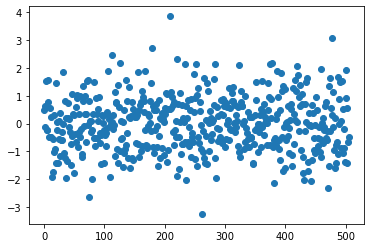

In [187]:
plt.scatter(np.arange(N),noise)

In [188]:
np.array(y).reshape(506).shape

(506,)

In [189]:
noise.shape

(506,)

In [190]:
y_with_noise = np.array(y).reshape(506) + noise

In [191]:
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.5317591780870768

In [192]:
r2_score(y, y_pred)

0.5419440594477221

Тут сломан валидатор и он принимает числа из диапазона (0, 1)

## Задание 7.3.4

Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром alpha = 1.002 и добавьте к исходным значениям целевой переменной. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [193]:
def hetero_eps(alpha, eps):
    hetero_eps = np.zeros(len(eps))
    for i in range (0,len(eps)):
        hetero_eps[i] = (alpha**i) * eps[i]
    return hetero_eps

In [194]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)
hetero_noise  = hetero_eps(alpha = 1.002, eps = noise)

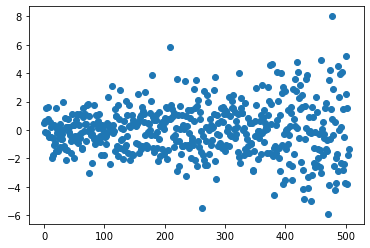

In [195]:
plt.scatter(np.arange(N),hetero_noise)

In [196]:
hetero_noise.shape

(506,)

In [197]:
y_with_noise = np.array(y).reshape(506) + hetero_noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.514276959678893

## Задание 7.3.5
В каком случае R2 (доля объясненной дисперсии) получается лучше? Ответ: Для белого шума

## Задание 7.3.6
Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром alpha = 0.998 и добавьте к исходным значениям целевой переменной. Обучите модель и найдите R2 (долю объясненной дисперсии).

In [198]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)
hetero_noise  = hetero_eps(alpha = 0.998, eps = noise)

y_with_noise = np.array(y).reshape(506) + hetero_noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)

0.5372516885216415

## Задание 7.3.6
В каком случае  (доля объясненной дисперсии) получается лучше?

In [199]:
noise = white_noise(N = y.shape[0], mu = 0, sigma = 1)

y_with_noise = np.array(y).reshape(506) + noise
# Fit
LR.fit(X[['CRIM', 'RM']],y_with_noise)
# Predict
y_pred = LR.predict(X[['CRIM', 'RM']])
r2_score(y_with_noise, y_pred)


0.5317591780870768

## Задание 7.3.7
В каком случае R2 (доля объясненной дисперсии) получается лучше? Ответ: Для гетероскедастичного шума с параметром alpha = 0.988

## Дополнительные материалы
[Оценка результатов линейной регрессии](https://habr.com/ru/post/195146/ 'Habr')

# 7.4. Предсказание и объяснение
Регрессионный анализ решает две основные задачи:

- Задача предсказания состоит в том, чтобы по имеющимся данным предсказать целевую переменную для нового наблюдения.
- Задача объяснения отвечает на вопрос, какие признаки для объяснения целевой переменной значимы.

И решаются эти задачи по-разному!

## Задание 7.4.1
В каких задачах необходимо решать задачу прогнозирования?
- Хотим понять, как будут вести себя акции Google в ближайшие 3 дня
    - Хотим понять, что влияет на рост популярности Ольги Бузовой в Instagram
    - Хотим понять, есть ли расовая дискриминация в карьерном росте сотрудников компании
- Хотим понять, какой будет скорость ветра на чемпионате Европы по виндсерфингу

## Дополнительные материалы
[Подробнее о скользящем среднем и другим методах сглаживания ряда](https://habr.com/ru/company/ods/blog/327242/ 'Открытый курс машинного обучения. Тема 9. Анализ временных рядов с помощью Python')

# 7.5. Скользящее среднее
Напомним, что временной ряд — это измерения одной и той же случайной величины в разные моменты времени.

При этом в идеальном случае соблюдаются условия:
- шаг по времени для всей базовой линии одинаков;
- наблюдения фиксируются в один и тот же момент каждого временного отрезка (например, в полдень каждого дня, первого числа каждого месяца);
- нет пропусков в данных.

Что мы хотим делать с временными рядами?
- Во-первых, выявлять закономерности развития.
- Во-вторых, оценивать, насколько хорошо выявлена закономерность.
- В-третьих, делать прогнозы на будущее, то есть экстраполировать.

## CКОЛЬЗЯЩЕЕ СРЕДНЕЕ
Интуитивно понятный способ превратить непонятную «пилу» в график, на котором можно что-то увидеть — это скользящее среднее или Moving Average (MA). Проще всего взять среднее арифметическое последних двух наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда.

Чуть более продвинутый способ: усреднить сразу несколько наблюдений. Это так называемое простое скользящее среднее (SMA).

Продвинутым вариантом является взвешенное скользящее среднее (WMA) k последовательных наблюдений ряда. Сумма весов при этом равна единице.

## Преимущества
Скользящее среднее может позволить нам невооруженным взглядом найти закономерности во временном ряде. Но может и не позволить, тогда нужны более продвинутые методы анализа.
Скользящее среднее можно использовать для прогноза, однако его качество оставит желать лучшего.

## Недостатки
Недостатком скользящего среднего с фиксированным окном является то, что оно учитывает только несколько последних наблюдений. От этого можно избавиться экспоненциальным сглаживанием, о котором мы поговорим немного позже.


In [200]:
import numpy as np

## Задание 7.5.1
Для анализа временного ряда необходимы следующие условия:
    
- 0  Значения ряда должны быть нескореллированы друг с другом
- 1 Значения ряда должны быть измерены с одинаковым шагом по времени
- 1 Значения ряда не должны иметь пропусков
- 0 Значения ряда в среднем должны быть константой
- 0 Значения ряда должны иметь одинаковые дисперсии

## Задание 7.5.2
Вы вычисляете скользящее среднее по правилу MA = 0.7*x_t +0.3 * x_(t-1)

1. Найдите ширину окна: 2
2. Это скользящее среднее является:
- простым
- взвешенным - верно
3. Вычислите значения простого скользящего среднего для ряда 
- SMA_1: 1.5
- SMA_2: 2.5
- SMA_3: 3.5
- SMA_4: 4.5
- SMA_5: 5.5
4. Какое измерение в ряде X = (1,2,3,4,5,6) является последним по времени: 6
5. Вычислите значения скользящего среднего по правилу  для ряда 
- MA_1: 1.7
- MA_1: 2.7
- MA_1: 3.7
- MA_1: 4.7
- MA_1: 5.7
6. В сторону какого наблюдения смещены значения скользящего среднего из п.5 по сравнению с простым скользящим средним?
- в сторону более нового - верно
- в сторону более старого
7. Сколько значений будет иметь ряд скользящих средних, если у исходного ряда доступно 10 наблюдений? Ответ: 9

## Задание 7.5.3
Выберите верные утверждения для скользящего среднего.
- 1 Скользящее среднее сглаживает пики и выбросы временного ряда
- 0 Скользящее среднее в момент времени  использует только исторические данные ряда в моменты времени, предшествующие 
- 1 Скользящее среднее в момент времени  использует текущее значение ряда 
- 0 В качестве прогноза будущего значения  можно использовать 
- 1 В качестве прогноза будущего значения  нельзя использовать 

## Задание 7.5.4
Простое и взвешенное скользящие средние используют при вычислении:
- 0 Все доступные значения ряда
- 1 Только несколько последних значений ряда

## Задание 7.5.5
1. Для ряда x = (1, 0, 1, -1, 2, 0, 1). Вычислите ряд скользящих средних с шириной окна 3 и весами: 0.5, 0.3, 0.2

In [201]:
def w_m_a(x, w):
    wma_count = len(x) - len(w) + 1
    for i in range(wma_count):
        print('wma_'+str(i+len(w)-1), round(np.sum(x[i:len(w)+i]*w),1))
    #return None

In [202]:
x = np.array([1, 0, 1, -1, 2, 0, 1])
w = np.array([0.2, 0.3, 0.5])
w_m_a(x, w)

wma_2 0.7
wma_3 -0.2
wma_4 0.9
wma_5 0.4
wma_6 0.9


2. Сколько значений будет иметь ряд скользящих средних с шириной окна , если у исходного ряда  наблюдений?

In [203]:
100 - 3 + 1

98

3. Сколько значений будет иметь ряд скользящих средних с шириной окна , если у исходного ряда  наблюдений?

In [204]:
100 - 50 + 1

51

4. Какое из скользящих средних сильнее сгладит исходный ряд?

- SMA с шириной окна 3 
- MA с шириной окна  50 верно

5. Какие из следующих утверждений верны для скользящего среднего за более короткий период времени?
- 1 Скользящее среднее будет меняться быстрее в зависимости от цены
- 0 Скользящее среднее будет медленнее регаировать на изменения цены
- 1 Скользящее среднее будт демонстрировать меньше надежных сигналов, чем более скользящее среднее за более долгий срок
- 0 Скользящее среднее будт демонстрировать больше надежных сигналов, чем более скользящее среднее за более долгий срок

## Дополнительные материалы
- [Скользящие средние. Часть 1 — теория](https://av-finance.ru/texnicheskij-analiz/skolzyashhie-srednie-chast-1-teoriya.html)
- [Использование скользящих средних в трейдинге](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp 'How to Use a Moving Average to Buy Stocks')

## 7.6. Практика. Скользящее среднее

- Загрузите датасет solarpower_cumuldaybyday2.csv.

В нём содержится информация о производстве энергии солнечными батареями.

- Агрегируйте данные по неделям.

- Выполните задания ниже.

In [205]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import time

In [206]:
# подгрузим наш учебный датасет
df = pd.read_csv('solarpower_cumuldaybyday2.csv')[['date', 'cum_power']]

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [208]:
# приведем формата даты к стандарту datetime. 
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
# добавим столбе дня недели
df['weekday'] = df['date'].apply(lambda x: x.strftime('%a'))
# преобразуем индексы в формат Datetime (это удобно для работы с временными рядами) 
df = df.set_index(pd.DatetimeIndex(df['date']))
# после это удалим столбец data
df.drop(['date'], axis =1, inplace = True)

In [209]:
list(df.columns)

['cum_power', 'weekday']

In [210]:
# Агрегируйте данные по неделям.
df_w = df[(list(df.columns))]
df_w = df_w.resample('w').ffill()

In [211]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2011-10-30 to 2018-10-28
Freq: W-SUN
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cum_power  366 non-null    float64
 1   weekday    366 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


## Задание 7.6.1

- Постройте ряд еженедельного производства энергии, вычислив приращения полученного недельного ряда. В поле для ответа введите значение произведенной энергии за неделю с 6 по 12 октября 2014, округлив до целых.

In [212]:
df_w.drop('weekday', axis = 1, inplace = True)

In [213]:
%timeit pass##тут функция

7.56 ns ± 0.0381 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [214]:
def decumsum_1():
    # 1 вариант деаккумуляции
    df_w['power'] = df_w['cum_power'] - np.hstack([0, df_w['cum_power'].values])[:366]
    return None
def decumsum_2():
    # 2 вариант деаккумуляции
    df_w['power_2'] = np.diff((np.hstack([0, df_w['cum_power'].values])))
    return None
def decumsum_3():
    # 3 вариант деаккумуляции
    df_w['power_3'] = df_w['cum_power'].diff().fillna(df_w['cum_power'])
    return None

In [215]:
# %timeit decumsum_1()
# %timeit decumsum_2()
# %timeit decumsum_3()

In [216]:
decumsum_1()
decumsum_2()
decumsum_3()

In [217]:
df_w.iloc[0:366:73]

,cum_power,power,power_2,power_3
date,,,,
2011-10-30,34.2,34.2,34.2,34.2
2013-03-24,4479.4,52.6,52.6,52.6
2014-08-17,11071.0,125.0,125.0,125.0
2016-01-10,16148.0,15.0,15.0,15.0
2017-06-04,21808.0,141.0,141.0,141.0
2018-10-28,28120.0,25.0,25.0,25.0


In [218]:
df_w[['power', 'power_2', 'power_3']].sum()

power      28120.0
power_2    28120.0
power_3    28120.0
dtype: float64

In [219]:
# 1 вариант поиска значения произведенной энергии за неделю с 6 по 12 октября 2014
df_w[df_w.index == datetime(2014, 10, 12)]

,cum_power,power,power_2,power_3
date,,,,
2014-10-12,11721.0,44.0,44.0,44.0


In [220]:
# 2 вариант поиска значения произведенной энергии за неделю с 6 по 12 октября 2014
df_w.loc[datetime(2014, 10, 12)][0] - df_w.loc[datetime(2014, 10, 5)][0]

44.0

In [221]:
# Ответ 1: 44

- Постройте ряд скользящего среднего для размера окна 4. Сколько элементов в ряде скользящего среднего?

In [222]:
# создадим отдельный Series для цен power
power_w = df_w.power
power_w.head()

date
2011-10-30    34.2
2011-11-06    37.6
2011-11-13    28.1
2011-11-20    36.6
2011-11-27    19.6
Freq: W-SUN, Name: power, dtype: float64

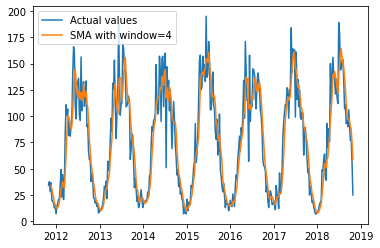

In [223]:
SMA_4 = power_w.rolling(window = 4).mean()
# Нарисуем красивый график
plt.plot(power_w,label="Actual values")
plt.plot(SMA_4,label="SMA with window=4")
plt.legend(loc="upper left")
plt.show()

In [224]:
SMA_4

date
2011-10-30       NaN
2011-11-06       NaN
2011-11-13       NaN
2011-11-20    34.125
2011-11-27    30.475
               ...  
2018-09-30    95.250
2018-10-07    90.500
2018-10-14    87.250
2018-10-21    74.500
2018-10-28    58.500
Freq: W-SUN, Name: power, Length: 366, dtype: float64

#### Постройте ряд скользящего среднего для размера окна 4. Сколько элементов в ряде скользящего среднего?

- Столько же, сколько в исходном - **верно**
- Меньше, чем в исходном

In [225]:
SMA_4[SMA_4 >= 0]

date
2011-11-20    34.125
2011-11-27    30.475
2011-12-04    25.875
2011-12-11    23.175
2011-12-18    17.225
               ...  
2018-09-30    95.250
2018-10-07    90.500
2018-10-14    87.250
2018-10-21    74.500
2018-10-28    58.500
Freq: W-SUN, Name: power, Length: 363, dtype: float64

### Сколько числовых элементов в ряде скользящего среднего?

Ответ: 363

### Найдите значение ряда скользящего среднего с шириной окна  для .

Ответ: 21.5

In [226]:
SMA_4.iloc[119]

21.5

### Какое скользящее среднее даст большее сглаживание данных?

- С окном 4 
- С окном 12 - **верно**

# 7.7. Тренд и сезонность

Весь анализ временных рядов напоминает большую капусту.

- Первый лист — это тренд.

Тренд — основная тенденция изменения величины со временем.

Большой бонус тренда — его можно прогнозировать как функцию времени, не учитывая предыдущие значения временного ряда.

Описывает чистое влияние долговременных факторов, изменяется плавно. Например, рост численности населения.

- Второй лист — сезонная компонента.

(СЕЗОННОСТЬ) Представляет собой последовательность почти повторяющихся циклов. Например, объемы продаж цветов накануне 8 марта или авиабилетов в сезон отпусков летом.

(ЦИКЛИЧНОСТЬ) Состоит из циклов, меняющихся по длительности и амплитуде, описывает периоды подъема и спада. Например, это может быть связано с изменением спроса и предложения в экономике или изменениями в финансовой и налоговой политике.

- Третий лист(?)...кочерыжка...Идея анализа закономерностей временных рядов очень проста: «снимаем» листы по очереди, пока не доберёмся до «кочерыжки». В роли кочерыжки выступает белый шум.

(ШУМ) Останется после того, как мы вычтем все вышеперечисленные компоненты. Никакого глубокого смысла этот показатель не несет.




## Самый простой вариант:
- линейный тренд
- остаток - белый шум.
## Чуть более сложный:
- убрали тренд, но осталась закономерность;
- убрали сезонность;
- остаток - белый шум.
## Совсем сложно:
- убрали тренд и сезонность;
- остаток всё ещё не белый шум.

## Задание 7.7.1
1. Сезонность означает:
- что среднее значение ряда идет то вниз, то вверх
- что среднее значение ряда идет то вниз, то вверх с постоянным периодом - верно
Ответ
Верно:Ряды, в которых среднее значение колеблется с неравным периодом, называют циклическими

2. Сезонность возникает:
- Если значения ряда чувствительны к каким-либо временным периодам (суточным, недельным, годовым и т. п.) и измерены в течение нескольких таких периодов - верно
- Если значения ряда измерены в течение хотя бы одного года
3. Наличие тренда означает:
- Что значения ряда циклически меняются
- Что значения ряда в среднем имеют тенденцию развития в зависимости от времени (например, убывают или возрастают) - верно

## Задание 7.7.2

Представим, что вы откликаетесь на вакансию, где в одной из рабочих обязанностей указан анализ временных рядов. Один из самых простых вопросов, который вам могут задать на собеседовании, будет связан с выявлением возможных трендов и сезонности. Возможно, вас также попросят описать свои дальнейшие действия после обнаружения закономерностей.

Что вы можете сказать о таком временном ряде?

- Наблюдается цикличность: каждый год число участников увеличивается на определенное число
- Наблюдается тренд: число участников увеличивается линейно - верно
- Наблюдается сезонность: к концу каждого года число участников возрастает

## Задание 7.7.3
Что присутствует в ряду на картинке ниже?
- 1 тренд
- 0 сезонность
- 1 цикличность

# 7.8. Практика. Тренд и сезонность
В этом разделе модуля познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

Будем использовать ноутбук decomp_air.ipynb и датасет к нему AirPassengers.csv.

- Сделайте декомпозицию на тренд, сезонность и остатки данных из конфетного датасета candy_production.csv.
- Выполните задания ниже.

In [227]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [228]:
df = pd.read_csv('candy_production.csv')

In [229]:
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [230]:
df.columns = (['date','items'])

In [231]:
df.head()

,date,items
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


## Задание 7.8.1

### 1. Сколько элементов содержит исходный датасет?

  - 548


In [232]:
len(df)

548

### 2. Сколько элементов содержит шумовая часть?

In [233]:
df = df.set_index(pd.DatetimeIndex(df['date']))
df.drop(['date'], axis = 1, inplace = True)
df.head()

,items
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


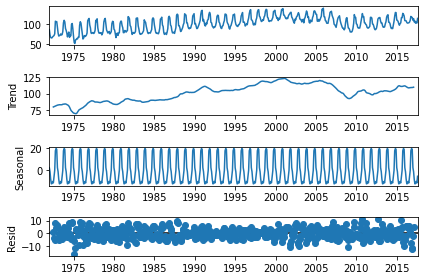

In [234]:
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show()

In [235]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [236]:
residual_part

date
1972-01-01   NaN
1972-02-01   NaN
1972-03-01   NaN
1972-04-01   NaN
1972-05-01   NaN
              ..
2017-04-01   NaN
2017-05-01   NaN
2017-06-01   NaN
2017-07-01   NaN
2017-08-01   NaN
Name: resid, Length: 548, dtype: float64

### 3. Сколько числовых элементов содержит шумовая часть?

In [237]:
residual_part.dropna()

date
1972-07-01     0.585060
1972-08-01    -4.098878
1972-09-01    -5.638989
1972-10-01     8.035513
1972-11-01     4.132112
                ...    
2016-10-01    -7.826012
2016-11-01   -12.238976
2016-12-01   -11.886948
2017-01-01    -2.359511
2017-02-01     5.045926
Name: resid, Length: 536, dtype: float64

### 4. Сколько элементов содержит сезонная часть?

In [238]:
seasonal_part

date
1972-01-01     2.589332
1972-02-01    -1.191542
1972-03-01    -7.848780
1972-04-01   -12.183376
1972-05-01   -11.911893
                ...    
2017-04-01   -12.183376
2017-05-01   -11.911893
2017-06-01   -10.045872
2017-07-01   -11.290469
2017-08-01    -5.273063
Name: seasonal, Length: 548, dtype: float64

### 5. Сколько числовых элементов содержит сезонная часть? 

In [239]:
seasonal_part.dropna()

date
1972-01-01     2.589332
1972-02-01    -1.191542
1972-03-01    -7.848780
1972-04-01   -12.183376
1972-05-01   -11.911893
                ...    
2017-04-01   -12.183376
2017-05-01   -11.911893
2017-06-01   -10.045872
2017-07-01   -11.290469
2017-08-01    -5.273063
Name: seasonal, Length: 548, dtype: float64

### 6. Поделитесь картинкой декомпозиции в нашем канале [Slack](https://sfdatasciencecourse.slack.com/archives/CRQT4KNPP/p1600685911008100).

# 7.9. Нестационарные временные ряды

Идея стационарности временного ряда в том, что его свойства не зависят от конкретного момента времени.

Примерами нестационарных рядов являются ряды с трендом и сезонностью. В этом случае у ряда будет непостоянное среднее.

Также возможен вариант, когда «гуляет» дисперсия: на каких-то участках разброс значений маленький, а на каких-то большой.

## В ЧЁМ ПРОБЛЕМА?

Какие проблемы сулит нам нестационарность?

Легко может оказаться, что вы обучите регрессию, оцените, и все статистические тесты скажут вам, что она значима и внутри сэмпла она будет хорошо прогнозировать и обещать вам супер-стратегию на много денег.

Однако дальше вас ждёт сюрприз, потому что ничего не предвещало (а особенно ваша модель), но ряд внезапно и надолго пошел вверх. И вся ваша прекрасная стратегия умножилась на ноль, потому что она больше ничего не угадывает.

## SPURIOUS REGRESSION

Самый большой страх при анализе временных рядов — найти закономерность, которой на самом деле нет, то есть принять случайное за закономерное. Это называется ложная регрессия (англ. spurious regression).

## КАК ИЗБЕЖАТЬ ПРОБЛЕМ?

Существуют два инструмента:

- Проверка ряда на стационарность с выбором подходящей модели в зависимости от её результата.
- Обязательная проверка готовой обученной модели out of sample (за пределами обучающей выборки).

## ПРОВЕРКА НА СТАЦИОНАРНОСТЬ 

- Первое, что мы делаем, это рисуем график временного ряда и ищем нестационарность на глаз. Часто можно явно увидеть тренд и сезонность, особенно если знать что-то о природе данных. Например, экономические данные (продажи, клики, производство чего-нибудь) почти всегда периодичны.

- Второй вариант проверки — это статистические тесты. Самый популярный и реализованный в Python — тест Дикки-Фуллера.

По умолчанию считаем ряд нестационарным. Наши данные могут противоречить этой гипотезе или не противоречить.

Мерой доверия к гипотезе по умолчанию («нулевой гипотезе») является величина p-value. Если упростить: p-value показывает, насколько правдоподобна нулевая гипотеза при имеющихся данных. Чем p-value меньше, тем меньше мы верим в нестационарность, и тем больше у нас оснований отвергнуть нулевую гипотезу и считать ряд стационарным.

P-value будет считать за нас Python.

Классическая договоренность:

- p-value  < 0.01  — точно отвергаем нулевую гипотезу;
- p-value: 0.01-0.05 — отвергаем и считаем ряд стационарным, но уже не так уверены;
- p-value: 0.05-0.1 — пограничный случай, слабое свидетельство стационарности;
- p-value  > 0.1— не отвергаем, продолжаем считать ряд нестационарным.

## ПРОВЕРКА МОДЕЛИ OUT OF SAMPLE

Как выполняется проверка out of sample:

В классической регрессии: случайно делим выборку на train-test, обучаем на train, тестируем на test.
В анализе временных рядов нельзя делить выборку случайно, так как нам важна последовательность измерений, поэтому мы делим весь ряд на последовательные куски. Например, обучаем на train (первой 1000 измерений), тестируем на test (следующих двух сотнях).

## Задание 7.9.1
Что является признаком нестационарности временного ряда?

- 1 Наличие тренда
- 0 Большая дисперсия
- 1 Неравномерная дисперсия
- 1 Наличие сезонности

## Задание 7.9.2
1. Что такое Spurious regression?
- 1 Случайные колебания ряда приняли за закономерные верно
- 0 Закономерные колебания ряда приняли за случайные
2. В чем ловушка Spurious regression?
- 0 Можем прогнать регрессию на время, найти тренд, но он не будет линейным
- 0 Можем прогнать регрессию на время, найти тренд, но статистика скажет, что он незначим
- 1 Можем прогнать регрессию на время, найти тренд, но ряд дальше не будет ему следовать
- 1 Не сможем статистическими методами понять, ложный получился тренд в регрессии или настоящий
верно
3. Как избежать ловушек ложных регрессий?
- 0 никогда не строить регрессии для временных рядов
- 1 проверять регрессионную модель на новых данных, не участвовавших в обучении верно
- 0 статистически проверять значимость полученных регрессий, например, по r2_score
4. Как делать проверку модели out of sample на временных рядах?
- 0 случайным образом разделить наблюдения на train-test
- 1 разделить наблюдения на две части, состоящие из последовательных наблюдений верно
5. Почему нельзя делить данные случайным образом, как в классической регрессии?
- 1 потому что значения временного ряда зависят от предыдущих наблюдений и нам важен порядок, в котором они расположены
- 0 из-за возможной нестационарности
- 1 перемешивание данных временного ряда может нарушить тренд и сезонность
- 0 можно так делить

## Задание 7.9.3
При тестировании гипотез, так же как и в медицинских тестах, возможны ошибки  и  рода. Это значит, что даже если p-value очень мало, возможно, это случайность и на самом деле нулевая гипотеза всё же верна.

1. Что будет ошибкой  рода в тесте Дикки-Фуллера (отвергли нулевую гипотезу, хотя она верна)?

- мы считаем ряд стационарным, а на самом деле он нестационарный верно
- мы считаем ряд нестационарным, а на самом деле он стационарный
2. Тест Дикки-Фуллера не отверг гипотезу о нестационарности ряда. Это значит, что:
- Ряд точно нестационарный
- Возможно, ряд стационарный, но у нас нет доказательств верно
3. Вы провели тест Дикки-Фуллера на стационарность ряда и получили значение p-value . Это значит, что:
- Ряд точно стационарный
- Ряд точно не стационарный
- Вы достаточно уверены в том, что ряд стационарный верно
- Вы достаточно уверены в том, что ряд нестационарный

## Дополнительные материалы
	
В качестве дополнительной литературы рекомендуем вам:

- изучить статью [«Stationarity in time series analysis»](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322);
- прочесть о [Гипотезе](https://habr.com/ru/company/iticapital/blog/280954/) случайных блужданий для моделей рынка;
- освоить [примеры](http://www.hi-edu.ru/e-books/xbook732/files/lect/ver_dop3.pdf) стационарных случайных процессов;
- почитать подробнее о [стационарности](https://bsu.by/cache/Page/544153.pdf).

# 7.10. Практика. Нестационарность
В этом разделе мы:
- познакомимся со случайными блужданиями;
- узнаем, как их можно построить и в каких случаях они стационарны.

Будем использовать ноутбук random_walk.ipynb.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

## Задача 7.10.1
### Часть 1.
- Сгенерируйте  значений временного ряда по правилу X_t = 0.2*X_(t-1)+0.1*X_(t-2)+e_t.
- В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией.
- Постройте его график.
- Проверьте его на стационарность по критерию Дикки-Фуллера:
    - Ряд стационарен
    - Ряд не стационарен

In [12]:
# num - число шагов
# a_1 и a_2 - множители. 
# Xt = a_1*X(t-1)+a_2*X_(t-2)+e_t.
# mu, sigma - параметры шума
def normrwalk(num, a_1, a_2, mu = 0, sigma = 1):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    walk[1] = a_1*walk[0] + eps[1]
    for i in range (2,num):
        walk[i] = a_1*walk[i-1] + a_2*walk[i-2] + eps[i]
    #тест на стацонарность ряда при помощи теста Дикки-Фуллера
    test = sm.tsa.adfuller(walk)
    print ('p-value: ', test[1])
    if test[1]< 0.05:
        #s = 1
        print ('ряд стационарен')
    else:
        #s = 0
        print ('ряд не стационарен')
    return walk

p-value:  1.345154062971171e-12
ряд стационарен


[&lt;matplotlib.lines.Line2D at 0x1f76b478b48&gt;]

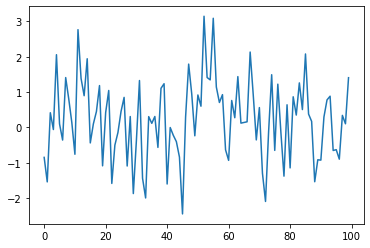

In [13]:
n_walk_01 = normrwalk(num = 100, a_1 = 0.2, a_2 = 0.1, mu = 0, sigma = 1)
plt.plot(n_walk_01)

### Часть 2.
- Сгенерируйте 100 значений временного ряда по правилу X_t = 0.9*X(t-1)+0.07*X_(t-2)+e_t.
- В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией
- Постройте его график.
- Проверьте его на стационарность по критерию Дикки-Фуллера:
    - Ряд стационарен
    - Ряд не стационарен

p-value:  0.4023902199304403
ряд не стационарен


[&lt;matplotlib.lines.Line2D at 0x1f76b48a808&gt;]

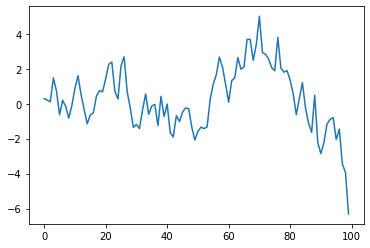

In [14]:
n_walk_01 = normrwalk(num = 100, a_1 = 0.9, a_2 = 0.07, mu = 0, sigma = 1)
plt.plot(n_walk_01)

## Эксперементы

In [15]:
# num - число шагов
# a_1 и a_2 - множители. 
# Xt = a_1*X(t-1)+a_2*X_(t-2)+e_t.
# mu, sigma - параметры шума
def normrwalk(num, a_1, a_2, mu = 0, sigma = 1):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    walk[1] = a_1*walk[0] + eps[1]
    for i in range (2,num):
        walk[i] = a_1*walk[i-1] + a_2*walk[i-2] + eps[i]
    #тест на стацонарность ряда при помощи теста Дикки-Фуллера
    test = sm.tsa.adfuller(walk)
    #print ('p-value: ', test[1])
    if test[1]< 0.05:
        s = 1
        #print ('ряд стационарен')
    else:
        s = 0
        #print ('ряд не стационарен')
    return s

In [16]:
s = 0
N = 1000
for i in range(N):
    s += normrwalk(num = 100, a_1 = 0.2, a_2 = 0.1, mu = 0, sigma = 1)
print('Ряд стационарен в {}% случаев'.format((s/N)*100))

Ряд стационарен в 98.7% случаев


In [17]:
s = 0
N = 1000
for i in range(N):
    s += normrwalk(num = 100, a_1 = 0.9, a_2 = 0.07, mu = 0, sigma = 1)
print('Ряд стационарен в {}% случаев'.format((s/N)*100))

Ряд стационарен в 12.9% случаев


# 7.11. Модель прогнозирования ARMA

[Справочник LaTeX формул](https://ru.wikibooks.org/wiki/Математические_формулы_в_LaTeX#List_of_mathematical_symbols)

[pyplot](https://pythonru.com/biblioteki/pyplot-uroki)

## АВТОРЕГРЕССИЯ AR(p)

Рассмотрим частный случай: AR(1)
$$ X_t = \phi*X_{t-1} + \varepsilon_t $$

Предполагаем, что каждое следующее значение ряда равно текущему, умноженному на константу, + белый шум. Это уже знакомая нам модель случайного блуждания.

Авторегрессионную модель можно обобщить до случая  AR(p), когда мы берём не одно прошлое измерение, а линейную комбинацию нескольких и ещё добавляем константу (белый шум) — уровень, к которому будет возвращаться ряд, если окажется стационарным

$$ X_t = \alpha + \phi_{1}*X_{t-1} + \phi_{2}*X_{t-2} +...+ \phi_{p}*X_{t-p} + \varepsilon_t $$

Неизвестными параметрами здесь являются $\alpha \quad и\quad \phi_{1}, ..., \phi_{p}$.

In [18]:
def ar(X, alpha = 0, fi = (0.3,0.3,0.3)):
    ar_p = []
    p = len(fi)
    for i in range(len(X)):
        if p-1 > i:
            ar_p.append(X[i])
        else:
            ar_p_i = alpha
            for f in range(len(fi)):
                ar_p_i += fi[f]*X[i-f-1]               
            ar_p.append(ar_p_i)
    return ar_p

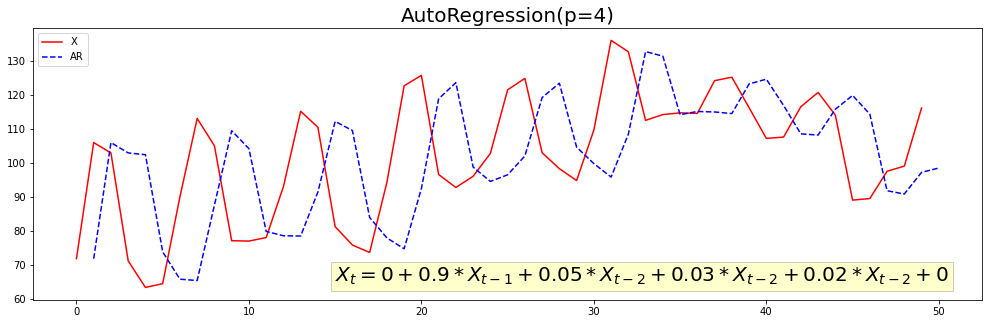

In [19]:
df = pd.read_csv('candy_production.csv')
plt.figure(figsize = (17,5)) # настроим размер графикан
y_candy=np.array(df.IPG3113N.iloc[1:500:10]) # для наглядности возьмём каждое N-ое значение 
x_1 = range(len(y_candy))
x_2 = range(1, len(y_candy)+1)
fi = (0.9,0.05,0.03,0.02)
ar_4 = ar(X = y_candy, alpha = 0, fi = fi)
plt.title('AutoRegression(p={})'.format(len(fi)), fontsize=20)
plt.text(15,65,r'$ X_t = 0 + 0.9*X_{t-1} + 0.05*X_{t-2} + 0.03*X_{t-2} + 0.02*X_{t-2} + 0 $', fontsize=20, bbox={'facecolor':'yellow','alpha':0.2})
#plt.grid()
plt.plot(x_1,y_candy,'r', x_2, ar_4, 'b--')
plt.legend(['X', 'AR'], loc=2)
plt.show()

## МОДЕЛЬ СКОЛЬЗЯЩЕГО СРЕДНЕГО
Модель скользящего среднего порядка q обозачается как MA(q) 
Говорим что X — это значение белого шума в момент в времени t + скользящее среднее с окном размера q

$$ X_t = \alpha+\varepsilon_t+\theta_1*\varepsilon_{t-1}+...+\theta_q*\varepsilon_{t-q} $$

Неизвестными являются $\alpha$ и q штук параметров $\theta$.

Как сделать прогноз? Из исторических данных при помощи линейной алгебры мы можем выразить все $\varepsilon$, кроме $\varepsilon_{t}$, потому что это отклонение, которое будет завтра, мы его ещё не знаем. Но мы знаем, что это компонента белого шума, а значит, её лучший прогноз — ноль, тогда
$$ \hat{X_t} = \hat{\alpha}+\varepsilon_t+\hat{\theta_1}*\varepsilon_{t-1}+...+\hat{\theta_q}*\varepsilon_{t-q}$$


## ARMA

**Идея!**

Давайте объединим эти две модели AR(p) и MA(q) в одну.

Мы получим модель ARMA(p,q) — модель авторегрессии и скользящего среднего. В ней p авторегрессионных слагаемых и q слагаемых скользящего среднего шумовой компоненты

  $$ X_t = \alpha + \phi_{1}*X_{t-1} + \phi_{2}*X_{t-2} +...+ \phi_{p}*X_{t-p} + \varepsilon_t+\theta_1*\varepsilon_{t-1}+...+\theta_q*\varepsilon_{t-q} $$

### Теорема Вольда: Любой стационарный ряд можно хорошо приблизить моделью класса .

У прогнозирования при помощи моделей ARMA есть ограничения. Помимо того, что они работают только на стационарных рядах, горизонт прогноза у них невелик, так как значения при отсутствии новых измерений быстро затухают в ноль или в константу.

## Задание 7.11.1

Рассмотрим модель   $ X_t = \varepsilon_t+0.5*\varepsilon_{t-1}$

1. Это частный случай:
- False: модели авторегрессии
- True: модели скользящего среднего
2. Вам известны значения $X_1=1, X_2=2.$. Считая $\varepsilon_0 = 0$ (стартовое значение шума). Найдите

- Значение шума при t=1: $\varepsilon_1 =???$ Ответ: 1 
- Значение шума при t=2: $\varepsilon_2 =???$ Ответ: 1.5
- Прогноз значения ряда при t=3: $\hat{X_3}=???$ Ответ: 0.75

## Задание 7.11.2
Рассмотрим модель $ X_t = \varepsilon_t+0.5*\varepsilon_{t-1}-0.1*\varepsilon_{t-2}$

Это частный случай:
- True: модели авторегрессии верно
- False:модели скользящего среднего

Вам известны значения $ X_1 = 10, X_2 = 8 $. Найдите прогноз значения ряда при t=3:

$\hat{X_3} = ???$ Ответ:3

## Задание 7.11.3
Выберите верное утверждение:

- False: В модели AR(p) для прогноза нужно знать все предыдущие значения ряда
- False: В модели AR(p) для прогноза нужно знать все предыдущие значения шума
- True: В модели AR(p) для прогноза нужно знать p предыдущих значения ряда
- False: В модели AR(p) для прогноза нужно знать p предыдущих значения шума

## Задание 7.11.4
Выберите верное утверждение:
- False: В модели MA(q) для прогноза нужно знать все предыдущие значения ряда
- True: В модели MA(q) для прогноза нужно знать все предыдущие значения шума
- False: В модели MA(q) для прогноза нужно знать q предыдущих значения ряда
- False: В модели MA(q) для прогноза нужно знать q предыдущих значения шума

## Задание 7.11.5
Выберите верные утверждения
- False: В модели ARMA(p,q) для прогноза нужно знать все предыдущие значения ряда
- True: В модели ARMA(p,q) для прогноза нужно знать все предыдущие значения шума
- True: В модели ARMA(p,q) для прогноза нужно знать p предыдущих значения ряда
- False: В модели ARMA(p,q) для прогноза нужно знать p предыдущих значения шума

# 7.12. Модель прогнозирования ARIMA
Что же делать, если ряд нестационарный?

## ДИФФЕРЕНЦИРОВАНИЕ РЯДА

Одна из идей состоит в том, чтобы рассматривать не сам ряд X, а его приращения:
$$ \Delta X_t =X_t - X_{t-1} $$

Вдруг они стационарны?

- Если да, мы можем строить ARMA модель для приращений $\Delta X_t$.
- Если нет, попробуем взять приращения следующего порядка

$$ \Delta^2 X_t =\Delta X_t - \Delta X_{t-1} = X_t -2X_{t-1}-2X_{t-2} $$

Вся эта процедура называется дифференцированием ряда по аналогии с дифференцированием непрерывных гладких функций. Хотя, конечно, временные ряды нельзя дифференцировать в классическом смысле из-за их дискретной природы.

Если после нескольких таких операций ряд приращений порядка d оказался стационарным, то исходный ряд X называется интегрированным рядом порядка d, где d — количество раз дифференцирования.

Итак, мы получили модель ARIMA(p,d,q), где
- AR(p) — авторегрессия;
- I(d) — интегрированность порядка d;
- MA(q) — скользящее среднее шумов.

## ОСОБЫЕ СЛУЧАИ

Что делать, если получить стационарные приращения не вышло, и бывает ли вообще такое? Бывает. Например, последовательность Фибоначчи не удастся сделать стационарной при помощи дифференцирования никогда.

На практике мы не будем проверять до бесконечности.

Что делать, если взяли несколько разностей, а стационарность не получается?

Можно пробовать другие модели, например, модель с сезонностью SARIMA.
Можно попытаться преобразовать исходный ряд, например при помощи логарифма.

## Задание 7.12.1

Для чего нужна модель ARIMA, если уже есть модель ARMA?
- ARIMA может компенсировать сезонность
- ARIMA может компенсировать нестационарность верно
- Это заговор математиков, чтобы всех запутать

Буква I в ARIMA означает:
- Интегрированность ряда , то есть разности ряда некоторого порядка стационарны верно
- Интегрируемость ряда , то есть суммы ряда некоторого порядка стационарны
- Интерполяцию, то есть прогнозы можно делать только внутри обучающей выборки

Модель ARIMA(5,3,7) расшифровывается как:
- 5 авторегрессионных слагаемых,  3 слагаемых скользящего среднего шумовой компоненты и нужно 7 раз дифференцировать ряд, прежде чем он станет стационарным
- 5 авторегрессионных слагаемых, 7 слагаемых скользящего среднего шумовой компоненты и нужно 3 раза дифференцировать ряд, прежде чем он станет стационарным верно
- 7 авторегрессионных слагаемых, 3 слагаемых скользящего среднего шумовой компоненты и нужно 5 раз дифференцировать ряд, прежде чем он станет стационарным

# 7.13. Автокорреляция и частичная автокорреляция

# 7.14. Практика. ACF и PACF

В этом разделе модуля мы узнаем: 

- как строить и интерпретировать ACF и PACF;
- как выглядят коррелограммы для искусственно сгенерированных AR, MA и ARMA рядов;
- как выглядят на коррелограммы реальных данных.

Будем использовать ноутбук acf_pacf.ipynb и датасет candy_production.csv.

Загрузите датасет AirPassengers.csv.

Выполните задания ниже.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

Задание 7.14.1
Постройте полную и частичную коррелограмму данных о пасажиропотоке.

1. На какой из коррелограмм видна сезонность?
- ACF
- PACF

In [21]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'], format = '%Y-%m')
df = df.set_index(pd.DatetimeIndex(df['Month']))
df.drop(['Month'], axis =1, inplace = True)
df.columns = ['Passengers']
df['Passengers'] = df['Passengers'].apply(lambda x: float(x))
p=df.Passengers
#df.head(3)

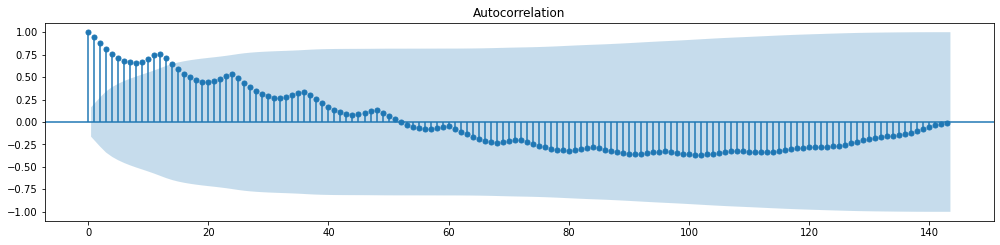

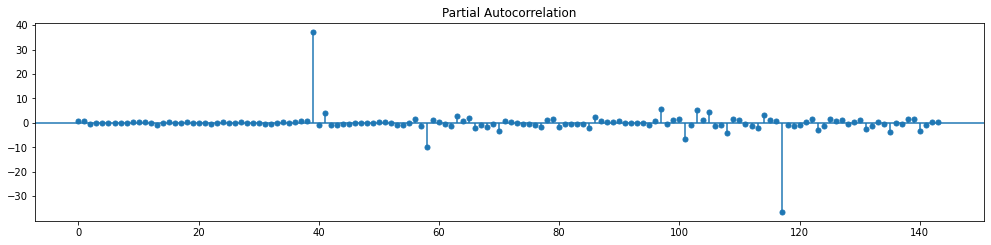

Критерий Дики-Фуллера: p=0.991880


In [22]:
plt.figure(figsize=(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(p.squeeze(), lags=143, ax=ax)
plt.show()

plt.figure(figsize=(17,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(p.squeeze(), lags=143, ax=ax)
plt.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(p)[1])

# Задание 7.14.2

Постройте полную и частичную коррелограмму первых разностей данных о пасажиропотоке.

1. Судя по тесту Дикки-Фуллера, является ли ряд первых разнностей стационарным? (В качестве порога возьмите значение 0.05)

In [23]:
p_d_1 = np.diff((np.hstack([0, p.values])))

[&lt;matplotlib.lines.Line2D at 0x1f76b508408&gt;]

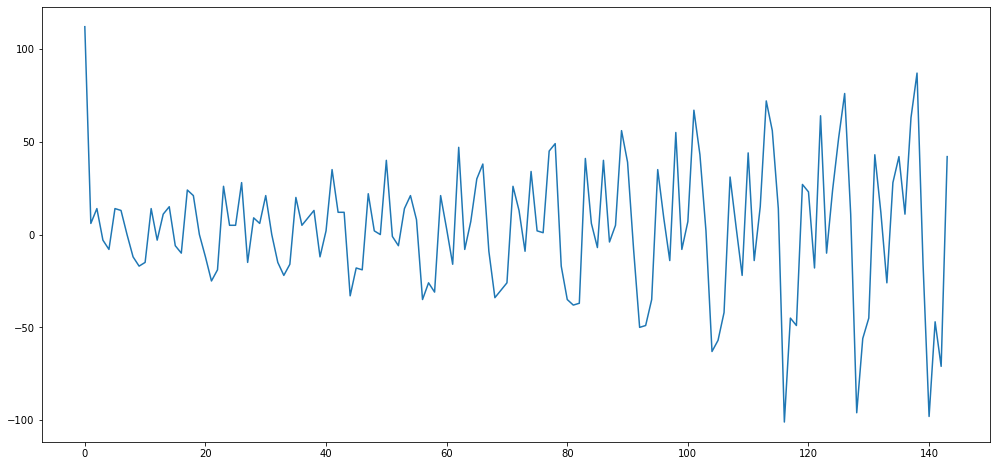

In [24]:
plt.figure(figsize = (17,8))
plt.plot(p_d_1)

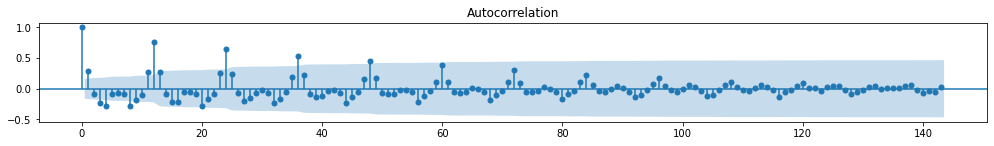

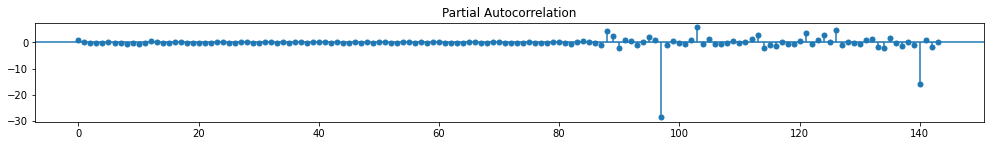

Критерий Дики-Фуллера: p=0.022734


In [25]:
p_d_1 = np.diff((np.hstack([0, p.values])))
plt.figure(figsize = (17,4))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(p_d_1.squeeze(), lags=143, ax=ax)
plt.show()

plt.figure(figsize = (17,4))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(p_d_1.squeeze(), lags=143, ax=ax)
plt.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(p_d_1)[1])

Задание 7.14.3
Постройте полную и частичную коррелограмму вторых разностей данных о пасажиропотоке.

1. Судя по тесту Дикки-Фуллера, является ли ряд вторых разнностей стационарным? (в качестве порога возьмите значение )

In [26]:
p_d_2 = np.diff((np.hstack([0, p_d_1])))

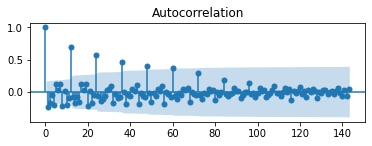

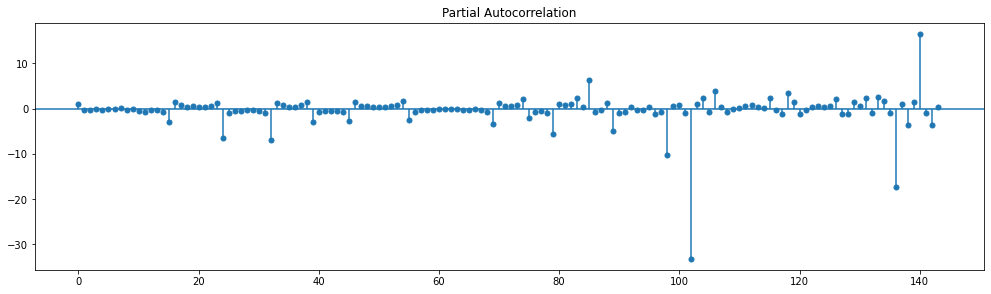

Критерий Дики-Фуллера: p=0.000000


In [27]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(p_d_2.squeeze(), lags=143, ax=ax)
plt.show()

plt.figure(figsize = (17,10))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(p_d_2.squeeze(), lags=143, ax=ax)
plt.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(p_d_2)[1])

# Задание 7.14.4
1/1 point (graded)
Как вы думаете, даёт ли тест Дикки-Фуллера полную информацию о стационарности ряда?


Да, если значения p-value существенно отличаются от пороговых
Нет, так как он может оказаться не чувствителен к сезонности ряда верно

# 7.15. Подбор коэффициентов для ARIMA

## Дополнительные материалы
- [ARIMA – модель прогнозирования
значений трафика](http://www.isa.ru/jitcs/images/documents/2011-02/41_49.pdf)
- [ПРОГНОЗИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ С ПОМОЩЬЮ ARIMA В PYTHON 3](https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/)
- [Анализ временных рядов с помощью python](https://habr.com/ru/post/207160/)